<a href="https://colab.research.google.com/github/Intannuraeni20102175/20102175_05_recyclerview/blob/main/klasifikassi%20twitter_20102175_intan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NIM = 20102175
NAMA = INTAN NURAENI

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/diabetes/LabeledText.xlsx'

In [4]:
data = pd.read_excel(file_path)

In [ ]:
# Preprocessing data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Caption'])
y = data['LABEL']

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re


# Cleansing: Menghapus karakter non-alphanumeric dan tanda baca
def cleansing(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

data['Caption'] = data['Caption'].apply(cleansing)

# Case Folding: Mengubah teks menjadi lowercase
data['Caption'] = data['Caption'].apply(lambda x: x.lower())

# Tokenizing: Memisahkan teks menjadi kata-kata (token)
data['tokens'] = data['Caption'].apply(word_tokenize)

# Mengimpor stopwords dari NLTK dan membuat set stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Menghapus stopwords dari teks
data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Stemming: Mengubah kata-kata menjadi bentuk dasarnya
stemmer = PorterStemmer()
data['tokens'] = data['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

# Menampilkan hasil preprocessing
print(data[['Caption', 'tokens']].head())


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 1. Logistic Regression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, lr_predictions))

Logistic Regression:
              precision    recall  f1-score   support

    negative       0.73      0.60      0.66       284
     neutral       0.62      0.74      0.67       367
    positive       0.76      0.71      0.73       323

    accuracy                           0.69       974
   macro avg       0.70      0.68      0.69       974
weighted avg       0.70      0.69      0.69       974



In [ ]:
# 2. Naïve Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
print("Naïve Bayes:")
print(classification_report(y_test, nb_predictions))

Naïve Bayes:
              precision    recall  f1-score   support

    negative       0.71      0.56      0.62       284
     neutral       0.63      0.61      0.62       367
    positive       0.64      0.79      0.71       323

    accuracy                           0.65       974
   macro avg       0.66      0.65      0.65       974
weighted avg       0.66      0.65      0.65       974



In [ ]:
# 3. Support Vector Machines (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
print("Support Vector Machines (SVM):")
print(classification_report(y_test, svm_predictions))

Support Vector Machines (SVM):
              precision    recall  f1-score   support

    negative       0.72      0.52      0.60       284
     neutral       0.58      0.77      0.66       367
    positive       0.77      0.67      0.72       323

    accuracy                           0.66       974
   macro avg       0.69      0.65      0.66       974
weighted avg       0.68      0.66      0.66       974



In [ ]:
# 4. Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, rf_predictions))

Random Forest:
              precision    recall  f1-score   support

    negative       0.73      0.44      0.55       284
     neutral       0.57      0.81      0.67       367
    positive       0.79      0.67      0.72       323

    accuracy                           0.66       974
   macro avg       0.69      0.64      0.65       974
weighted avg       0.69      0.66      0.65       974



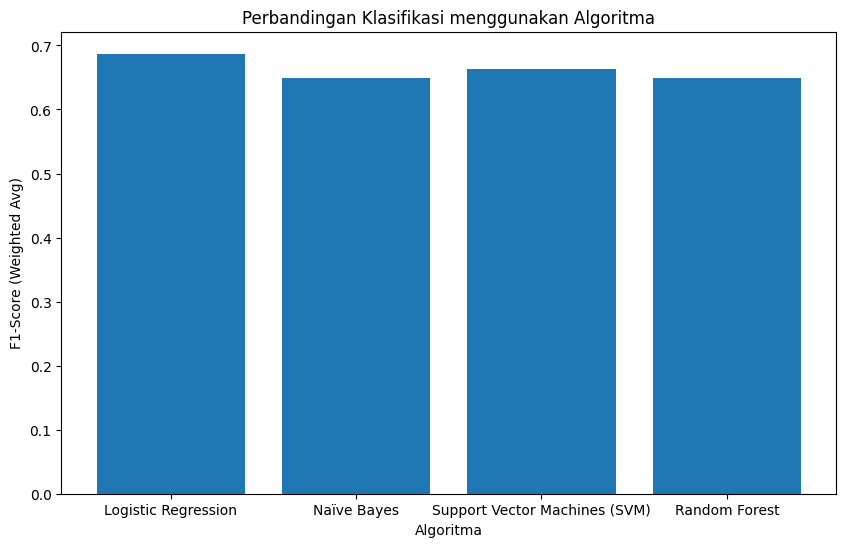

In [ ]:

import matplotlib.pyplot as plt
models = [
    LogisticRegression(),
    MultinomialNB(),
    SVC(),
    RandomForestClassifier()
]

model_names = [
    "Logistic Regression",
    "Naïve Bayes",
    "Support Vector Machines (SVM)",
    "Random Forest"
]

# Melatih dan mengevaluasi model
results = []
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions, output_dict=True)
    results.append(report['weighted avg']['f1-score'])

# Membuat grafik perbandingan
plt.figure(figsize=(10, 6))
plt.bar(model_names, results)
plt.xlabel('Algoritma')
plt.ylabel('F1-Score (Weighted Avg)')
plt.title('Perbandingan Klasifikasi menggunakan Algoritma')
plt.show()


In [20]:

# Membuat grafik perbandingan
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.bar(model_names, accuracies)
plt.xlabel('Algoritma')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi')

plt.subplot(2, 2, 2)
plt.bar(model_names, precisions)
plt.xlabel('Algoritma')
plt.ylabel('Presisi')
plt.title('Perbandingan Presisi')

plt.subplot(2, 2, 3)
plt.bar(model_names, recalls)
plt.xlabel('Algoritma')
plt.ylabel('Recall')
plt.title('Perbandingan Recall')

plt.subplot(2, 2, 4)
plt.bar(model_names, f1_scores)
plt.xlabel('Algoritma')
plt.ylabel('F1-Score')
plt.title('Perbandingan F1-Score')

plt.tight_layout()
plt.show()

NameError: ignored

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Preprocessing data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Caption'])
y = data['LABEL']

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menginisialisasi model
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Naïve Bayes', MultinomialNB()),
    ('Support Vector Machines (SVM)', SVC()),
    ('Random Forest', RandomForestClassifier())
]

# Melatih dan mengevaluasi model
results = []
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions, output_dict=True)
    results.append([name, report['accuracy'], report['weighted avg']['precision'],
                    report['weighted avg']['recall'], report['weighted avg']['f1-score']])

# Membuat tabel hasil klasifikasi
result_df = pd.DataFrame(results, columns=['Algoritma', 'Akurasi', 'Presisi', 'Recall', 'F1-Score'])
print(result_df)


                       Algoritma   Akurasi   Presisi    Recall  F1-Score
0            Logistic Regression  0.686858  0.696310  0.686858  0.687097
1                    Naïve Bayes  0.651951  0.655483  0.651951  0.648770
2  Support Vector Machines (SVM)  0.664271  0.682801  0.664271  0.663175
3                  Random Forest  0.656057  0.683953  0.656057  0.652007
